>> 1. Transfer Learning

관련된 데이터셋으로 학습된 모델을 불러와서 신규 데이터를 학습합니다. 

일반적으로 딥러닝 학습에 많은 데이터셋이 필요하나, 유사한 많은 데이터셋을 학습한 모델을 불러와서 추가적으로 학습을 시킵니다. 

그림: https://editor.analyticsvidhya.com/uploads/499849315476_1592890541_transfer.jpg

이때 앞쪽은 Convolution Layer 부분은 그대로 사용하고, 
분류하는 부분인 Fully Connected Layer 부분은 학습 데이터셋에 맞춰 새로 구성합니다. 

기존 데이터셋에 없는 class를 학습시키기 위해서 입니다. 

텐서플로우는 유명 알고리즘을 손쉽게 불러올 수 있도록 되어 있습니다. 

Resnet, VGG, Efficientnet 등 높은 성능을 나타내는 모델을 imagenet 등 대량의 데이터셋으로 학습해 둔 Pre-trained model(사전 학습 모델)을 불러올 수 있습니다. 

사전 학습된 VGG 모델을 불러와서 마스크 착용 판단 모델로 만들어 보겠습니다

VGG 모델은 아래와 같이 여러층의 Convolution Layer를 가지고 있습니다. 

https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png



>> 2.VGG 사전학습 모델 활용하여 학습하기

마스크셋 데이터를 불러옵니다.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = '/content/drive/MyDrive/Tensorflow AI/New Masks Dataset'
img_height = 150
img_width = 150

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Train',    
  image_size=(img_height, img_width))

Found 600 files belonging to 2 classes.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Validation',    
  image_size=(img_height, img_width))

Found 306 files belonging to 2 classes.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Test',    
  image_size=(img_height, img_width))

Found 100 files belonging to 2 classes.


텐서플로우에는 applications 모듈에 다양한 학습 모델을 제공하고 있습니다. 

사용 가능한 모델은 아래 링크에서 확인 가능합니다. 

https://www.tensorflow.org/api_docs/python/tf/keras/applications

좋은 성능을 낸 유명한 모델들입니다. 

모델을 불러올 때 include_top = False 옵션을 주어서 Convolution 부분만 가져옵니다. 

VGG 사전 모델은 imagenet 데이터셋으로 학습이 되어 있는 상태입니다.

imagenet 데이터셋은 일상에서 볼 수 있는 1000가지의 사물들에 대해 100만개 이상의 학습 데이터로 구성되어 있습니다. 

In [6]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(weights = 'imagenet',include_top=False, input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


기존에 강의에서 다룬 단순한 모델보다 더 많은 Layer로 이루어진 것을 볼 수 있습니다. 

대부분의 사전학습 모델들은 VGG 보다 더 많은 Layer로 구성되어 있습니다. 

In [7]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

새로운 라벨을 분류할 수 있도록 Fully Connected Layer를 새로 만듭니다. 

이때 기존 VGG 모델 부분은 weight가 바뀌지 않게 하고
FC 레이어만 트레이닝 합니다

이렇게 하면 VGG의 특징 추출을 활용하여 새로운 라벨을 분류하는 부분만 학습하기 때문에 쉽게 학습 가능합니다. 




.trainable = False로 하면 데이터 학습 시에 weight가 변경되지 않습니다. 
Trainable params가 0으로 바뀐것을 확인할 수 있습니다



In [8]:
vgg_model.trainable = False

In [9]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
from tensorflow.keras import Sequential, Model, layers
transfer_model = Sequential()

vgg 모델 위에 간단한 Fully Connected Layer를 구성합니다. 

In [11]:
transfer_model.add(vgg_model)

In [12]:
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(256,activation='relu'))
transfer_model.add(layers.Dropout(0.5))
transfer_model.add(layers.Dense(2,activation='softmax'))

transfer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 16,812,610
Trainable params: 2,097,922
Non-trainable params: 14,714,688
_________________________________________________________________


이제 학습을 해보도록 하겠습니다

In [13]:
transfer_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = transfer_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
19/19 [==============================] - 198s 7s/step - loss: 3.6153 - acc: 0.9133 - val_loss: 2.2451 - val_acc: 0.9444
Epoch 2/10
19/19 [==============================] - 6s 289ms/step - loss: 0.5803 - acc: 0.9867 - val_loss: 2.7265 - val_acc: 0.9771
Epoch 3/10
19/19 [==============================] - 6s 290ms/step - loss: 0.4247 - acc: 0.9900 - val_loss: 1.7423 - val_acc: 0.9542
Epoch 4/10
19/19 [==============================] - 6s 285ms/step - loss: 0.4352 - acc: 0.9917 - val_loss: 2.2350 - val_acc: 0.9771
Epoch 5/10
19/19 [==============================] - 6s 292ms/step - loss: 0.2987 - acc: 0.9867 - val_loss: 1.5420 - val_acc: 0.9706
Epoch 6/10
19/19 [==============================] - 6s 293ms/step - loss: 0.1161 - acc: 0.9983 - val_loss: 1.2231 - val_acc: 0.9739
Epoch 7/10
19/19 [==============================] - 6s 295ms/step - loss: 0.2732 - acc: 0.9950 - val_loss: 0.9607 - val_acc: 0.9837
Epoch 8/10
19/19 [==============================] - 7s 298ms/step - loss: 0.3

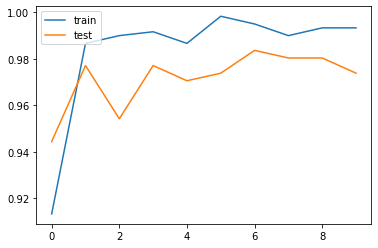

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')

사전학습 모델 활용으로 손쉽게 매우 높은 정확도에 도달 했습니다. 

In [15]:
# 테스트셋 정확도 평가

test_loss , test_acc = transfer_model.evaluate(test_ds)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 27s 309ms/step - loss: 1.0834e-05 - acc: 1.0000
test acc :1.0 test loss:1.0833829946932383e-05


In [16]:
# 모델 저장하기
transfer_model.save(data_dir+'mask_tl.h5')